# (Task 1.0) Data cleaning and pre-processing

### 1.1 Importing necessary libraries

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime
import datetime as dt

### 1.2 Data Acquisition

In [337]:
# Load the CSV file into Jupyter Notebook
# using "r" to indicate the file path as "raw string"
# store the string into a vairable called "file_path"
# using Pandas's read_csv() function to read the content in the file_path variable
# store the output in the "df" variable, short form for "dataframe"
file_path = r"netflix_titles.csv"
df = pd.read_csv(file_path)

In [338]:
# Using the head() function to show the first 10 rows of the dataset
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### 1.3 Data Cleaning and Preprocessing

#### 1.3.1 Handling missing data

In [339]:
# This section finds any NULL values in the dataset
# Using isna() function to indicate if the corresponding element in "df" is a missing value or not (NaN)
# Using any(axis=1) to check if any value in a row is a missing value 
# df[df.isna().any(axis=1)] will only select rows with at least 1 NaN values
# store the output into nan_df variable
nan_df = df[df.isna().any(axis=1)]

# Using the head() function to show the first 10 rows of dataset stored in "nan_df", where every row will contain at least 1 NaN values
# As you can see, nan_df will skip the original 7th, 8th, and 9th row in the dataframe since they do not contain any NaN values
nan_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


In [340]:
# Using sum() to calculate the total NaN values in each column
# The output is stored in nan_count variable
nan_count = df.isna().sum()

# Using sum().sum() to aggregate the total NaN values across all columns, providing one single output
total_nan_count = df.isna().sum().sum()

# Using a print() function to display the total NaN values for each column
print(nan_count)

# Using a print() function to display the total NaN values for the entire dataset
print("\nThe total NaN values in the entire dataset are:", total_nan_count)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The total NaN values in the entire dataset are: 4307


In [341]:
# Remove the rows with empty values in these 3 columns: date added, rating, and duration
# Firstly, these 3 columns have minimal NaN values. Removing these NaN values will not significantly impact the patterns of the dataset
# If we were to remove NaN values in "director", "cast", "country", we will remove hundreds of rows from the dataset, affecting the original pattern and trends
# Secondly, it makes sense to remove values in these 3 columns rather than replacing with some values which will affect the overall data accuracy
df.dropna(subset=['date_added', 'rating', 'duration'], inplace = True)

# Using sum() to calculate the number of NaN values for each column
df.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [342]:
# This section focuses on replace the remaining NaN values for "director", "cast", and "country"
# Replace all NaN values in "director" column to 'No Data'
# Replace all NaN values in "cast" column to 'No Data'
# Replace all NaN values in 'country' column with the mode 0
df['director'].replace(pd.NA, 'No Data',inplace  = True)
df['cast'].replace(pd.NA, 'No Data',inplace  = True)
df['country'] = df['country'].fillna(df['country'].mode()[0])

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [343]:
# Show the amount of NaN values after replacing them with 0
no_nan_count = df.isna().sum()
print(no_nan_count)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


#### 1.3.2 Check for duplicated rows

In [344]:
# Using the duplicated() function to find duplicated rows in the dataset
# The output is stored in a variable called "duplicateRows"
# Using sum() function to display the number of duplicated rows for each column

duplicateRows = df[df.duplicated()]
print(duplicateRows.sum())

print("The total number of duplicated row is", duplicateRows.sum().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: object
The total number of duplicated row is 0


#### 1.3.3 Identify formatting discrepancies

In [345]:
# Present an array of unique values from 'show_id' to identify any formatting discrepancies
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [346]:
# Present an array of unique values from 'date_added' to identify any formatting discrepancies
df['date_added'].unique() 

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [347]:
# Present an array of unique values from 'title' to identify any formatting discrepancies
df['title'].unique() 

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [348]:
# Present an array of unique values from 'director' to identify any formatting discrepancies
df['director'].unique() 

array(['Kirsten Johnson', 'No Data', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [349]:
# Present an array of unique values from 'cast' to identify any formatting discrepancies
df['cast'].unique() 

array(['No Data',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [350]:
# Present an array of unique values from 'release_year' to identify any formatting discrepancies
df['release_year'].unique() 

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [351]:
# Present an array of unique values from 'rating' to identify any formatting discrepancies
df['rating'].unique() 

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [352]:
# Present an array of unique values from 'duration' to identify any formatting discrepancies
df['duration'].unique() 

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

#### 1.3.4 Removing redundant columns

In [353]:
# This code is to drop the column 'Show Id' as it is not needed in rendering
df = df.drop(columns = df.columns[0], axis = 1)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 1.3.5 Data Transformation

In [354]:
# Transform the date_added column by splitting into 3 new columns to represent the month values, month names, and year
# This three new columns will be useful for data analysis in Part 3
# Using the datetime module to provides classes handling dates and times

# The "date_added" column is coverted to datetime format using to_datetime() function from datetime module
# If there are instances that are invalid for conversion, they will be set as NaN values, which stands for Not A Time using errors='coerce'
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

# Creates a new column called "month_added" to store the month values using dt.month function
df['month_added']=df['date_added'].dt.month

# Creates a new column called "month_name_added" to store the month names using dt.month_name() function
# Convert the data type to string using astype(str) function
df['month_name_added']=df['date_added'].dt.month_name()

# Creates a new column called "year_added" to store the year values using dt.year function
# Convert the data type to string using astype(int) function
df['year_added'] = df['date_added'].dt.year

# Using a print() function to show the first 5 rows
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0


In [355]:
# By checking the NaN values, there are NaN values appearing in the "date_added" and the 3 new columns due to the usage of error='coerce' above
df.isna().sum()

type                 0
title                0
director             0
cast                 0
country              0
date_added          88
release_year         0
rating               0
duration             0
listed_in            0
description          0
month_added         88
month_name_added    88
year_added          88
dtype: int64

In [356]:
# Using a for loop which iterates through each column in the dataset and drop rows with NaN values in each respective column 
for column in df.columns:
    df.dropna(subset=[column], inplace=True)
    
print("The total NaN values is: ",df.isna().sum().sum())

The total NaN values is:  0


In [357]:
# Converting the data types to a more appropriate data type for analysis
# Convert the data type to integer using astype(int) function
df['month_added'] = df['month_added'].astype(int)

# Convert the data type to string using astype(str) function
df['month_name_added'] = df['month_name_added'].astype(str)

# Convert the data type to integer using astype(int) function
df['year_added'] = df['year_added'].astype(int)

# Using the print function to display the first 5 rows of the dataset
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


#### 1.3.6 Check Data Type

In [358]:
# Created a new list "check_columns" which contains the names of all columns the dataframe
check_columns = df.columns

# Loop through each column and print their data types
for column in check_columns:
    data_type = df[column].dtype
    print(f"Data type of '{column}': {data_type}")

Data type of 'type': object
Data type of 'title': object
Data type of 'director': object
Data type of 'cast': object
Data type of 'country': object
Data type of 'date_added': datetime64[ns]
Data type of 'release_year': int64
Data type of 'rating': object
Data type of 'duration': object
Data type of 'listed_in': object
Data type of 'description': object
Data type of 'month_added': int64
Data type of 'month_name_added': object
Data type of 'year_added': int64


#### 1.3.7 Renaming column

In [359]:
# Change the column name of "listed_in" to "genre" as it better relates to the values
df.rename(columns={'listed_in': 'genre'}, inplace=True)

# Using head() function to display the dataset, showing the updated column name for "listed_in"
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021


#### 1.3.7 Detecting Outliers

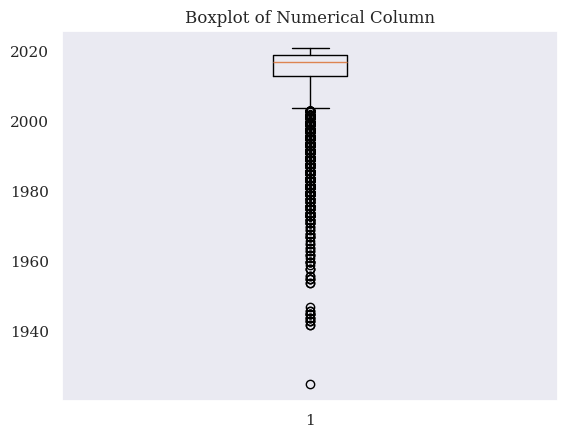

Identified outliers:
 7       1993
22      1996
24      1998
26      1997
41      1975
        ... 
8764    1994
8766    2002
8768    2001
8770    2001
8792    1973
Name: release_year, Length: 711, dtype: int64
Number of outliers: 711
However, there is no reason to remove these outliers since the outliers are not coming from system errors, but rather from actual data in the real world


In [360]:
# This section focuses on detecting outliers for "release_year", which is a numerical column
# Using a boxplot() function as the main graph to show the outliers
plt.boxplot(df['release_year'])
plt.title('Boxplot of Numerical Column')
plt.show()

# Store the column into a new variable called "numerical_column"
numerical_column = df['release_year']

# Calculate the interquartile range (IQR)
# The first quantile will be 25%
# The third quantiile will be 75%
# Calculate the interquartile range by finding the differnece between Q3 and Q1, and store the value in a variable called "IQR"
Q1 = numerical_column.quantile(0.25)
Q3 = numerical_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier values
# If the value is smaller than the lower boundary or the value is bigger than the upper boundary, the value is identified as an outlier
# The value is stored in the variable "outliers"
outliers = numerical_column[(numerical_column < lower_bound) | (numerical_column > upper_bound)]

# Using a print() function to display the identified outliers
print("Identified outliers:\n", outliers)

total_outliers = len(outliers)
print("Number of outliers:", total_outliers)
print("However, there is no reason to remove these outliers since the outliers are not coming from system errors, but rather from actual data in the real world")


#### 1.3.8 Data Quality Assurance

In [361]:
# Perform data quality checks to ensure the dataset is free from critical errors. 
# Verify that the data is now clean, complete, and ready for analysis.
df.info()

# Ensure there are no duplicate rows or titles
duplicateRows = df[df.duplicated()]
print("The total number of duplicated rows are:", len(duplicateRows))
duplicate_titles = df[df.duplicated(subset='title', keep=False)]
print("The total number of duplicated titles are:", len(duplicate_titles))

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8702 non-null   object        
 1   title             8702 non-null   object        
 2   director          8702 non-null   object        
 3   cast              8702 non-null   object        
 4   country           8702 non-null   object        
 5   date_added        8702 non-null   datetime64[ns]
 6   release_year      8702 non-null   int64         
 7   rating            8702 non-null   object        
 8   duration          8702 non-null   object        
 9   genre             8702 non-null   object        
 10  description       8702 non-null   object        
 11  month_added       8702 non-null   int64         
 12  month_name_added  8702 non-null   object        
 13  year_added        8702 non-null   int64         
dtypes: datetime64[ns](1), int64(3

# (Task 2.0) Data Exploration

### 2.1 Data Overview

#### 2.1.1 Size and shape of dataset

In [362]:
# Using the shape function to display the number of rows (observations) and columns (variables)
df.shape

(8702, 14)

### 2.2 Data Structure

#### 2.2.1 Structure of variables in the dataset

In [363]:
# Using the info function to display the name, count, and data type of each column (variable)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8702 non-null   object        
 1   title             8702 non-null   object        
 2   director          8702 non-null   object        
 3   cast              8702 non-null   object        
 4   country           8702 non-null   object        
 5   date_added        8702 non-null   datetime64[ns]
 6   release_year      8702 non-null   int64         
 7   rating            8702 non-null   object        
 8   duration          8702 non-null   object        
 9   genre             8702 non-null   object        
 10  description       8702 non-null   object        
 11  month_added       8702 non-null   int64         
 12  month_name_added  8702 non-null   object        
 13  year_added        8702 non-null   int64         
dtypes: datetime64[ns](1), int64(3

### 2.3 Data Distribution

#### 2.3.1 Descriptive statistics for numerical columns

In [364]:
# Using a for loop to iterate through each column in the dataframe
for column in df.columns:
    # Checking if the column is an integer data type or not
    if df[column].dtype == 'int64':
        # Filtering out non-numeric values using the 'apply' function
        numeric_column = df[column].apply(pd.to_numeric, errors='coerce')
        # Calculating mean, median, and standard deviation for the numeric column
        column_mean = round(numeric_column.mean(), 2)
        column_median = round(numeric_column.median(), 2)
        column_std = round(numeric_column.std(), 2)
        # Displaying the statistics for the numeric column
        print(f"\nStatistics for '{column}' column:")
        print(f"Mean: {column_mean}")
        print(f"Median: {column_median}")
        print(f"Standard Deviation: {column_std}")
        
    else:
        print(f"\n'{column}' column is of object type and will not be processed.")




'type' column is of object type and will not be processed.

'title' column is of object type and will not be processed.

'director' column is of object type and will not be processed.

'cast' column is of object type and will not be processed.

'country' column is of object type and will not be processed.

'date_added' column is of object type and will not be processed.

Statistics for 'release_year' column:
Mean: 2014.2
Median: 2017.0
Standard Deviation: 8.83

'rating' column is of object type and will not be processed.

'duration' column is of object type and will not be processed.

'genre' column is of object type and will not be processed.

'description' column is of object type and will not be processed.

Statistics for 'month_added' column:
Mean: 6.65
Median: 7.0
Standard Deviation: 3.43

'month_name_added' column is of object type and will not be processed.

Statistics for 'year_added' column:
Mean: 2018.89
Median: 2019.0
Standard Deviation: 1.57


#### 2.3.2 Frequency of categorical variables

In [365]:
# Define the categorical variables
categorical_variables = ['type', 'title', 'country', 'director', 'genre', 'rating']

# Creates a class to perform an analysis on categorical variables
class CategoricalAnalysis:
    
    # Constructor method that initializes an instance of CategoricalAnalysis with the DataFrame and categorical variables
    def __init__(self, df, categorical_variables):
        print("Frequency of Categorical Variables\n")
        self.df = df
        self.categorical_variables = categorical_variables
    
    # Method to process and analyze categorical variables in the DataFrame
    def process_categorical_variables(self):
        for column in self.categorical_variables:
            
            # If the column is 'country' or 'genre', split the values by ',' and take the first part
            # This is an exception for country and genre since these 2 columns have more than 1 value in each cell
            if column == 'country' or column == 'genre':
                self.df[column] = self.df[column].str.split(',').str[0]

            # Using the nunique() function to display the total number of unique values in the column
            unique_count = self.df[column].nunique()
            print(f"\nNumber of {column.capitalize()}: {unique_count}\n")

            # Using the unique() function to display the names of unique values in the column
            unique_names = self.df[column].unique()
            print(f"Name of {column.capitalize()}: {unique_names}\n")

            # Using the value_counts() function to display the count of each category in the column
            category_counts = self.df[column].value_counts()
            print(f"Category Counts of {column.capitalize()}:\n{category_counts}\n")
            
            print("-"*30)

    # Destructor method that is automatically called when the object is deleted
    def __del__(self):
        print("CategoricalAnalysis object has been destroyed.")

# Create an instance of CategoricalAnalysis
analysis = CategoricalAnalysis(df, categorical_variables)
analysis.process_categorical_variables()
del analysis  # This will trigger the destructor


Frequency of Categorical Variables


Number of Type: 2

Name of Type: ['Movie' 'TV Show']

Category Counts of Type:
type
Movie      6126
TV Show    2576
Name: count, dtype: int64

------------------------------

Number of Title: 8702

Name of Title: ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']

Category Counts of Title:
title
Dick Johnson Is Dead          1
Jandino: Whatever it Takes    1
Caught on Camera              1
Behind Enemy Lines            1
I'll Sleep When I'm Dead      1
                             ..
System Crasher                1
Puerta 7                      1
Passion. Panache. Pep         1
Hyena                         1
Zubaan                        1
Name: count, Length: 8702, dtype: int64

------------------------------

Number of Country: 86

Name of Country: ['United States' 'South Africa' 'India' 'United Kingdom' 'Germany'
 'Mexico' 'Turkey' 'Australia' 'Finland' 'China' 'Nigeria' 'Japan' 'Spain'
 'France' 'Belgium' 'So

#### 2.3.3 Statistical analysis between two categorical variables 

In [366]:
# A scientific computing library called "scipy" is imported to perform statistical analysis
# Import chi2_contingency to perform chi-square test
from scipy.stats import chi2_contingency

# Using a nested loop to perform chi-square tests by pairing up all the columns, this would save time and effort instead of manually coding each of them
# Using the "categorical_variables" variable which has been created above that stores all cateogrical columns
# The first loop iterates the position of the elements in "categorical_variables"
# The second loop, which is a nested loop to iterates the position of the elements in "categorical_variables"
# i+1 is used in the second loop to avoid pairing up the same variables
for i in range(len(categorical_variables)):
    for j in range(i + 1, len(categorical_variables)):
        
        # Two variables are created to stored the columns, which are "variable1" and "variable2"
        variable1 = categorical_variables[i]
        variable2 = categorical_variables[j]

        # Create a contingency table by using the crosstab() function to store both variables
        contingency_table = pd.crosstab(df[variable1], df[variable2])

        # Perform the chi-square test by using the chi2_contingency() function
        # The result is stored in the variable called "result"
        result = chi2_contingency(contingency_table)
        
        # Access the test statistic and p-value 
        # The first result will be stored in the variable called "chi2_statistic"
        # The second result will be stored in the variable called "p_value"
        chi2_statistic = result[0]
        p_value = result[1]

        # Print the results
        print(f"\nChi-square Test for {variable1} and {variable2}:")
        print(f"Chi-square Statistic: {chi2_statistic}")
        print(f"P-value: {p_value}")
        
        # Interpret the results
        if p_value < 0.05:
            print(f"There is a significant relationship between {variable1} and {variable2}.")
        else:
            print(f"There is no significant relationship between {variable1} and {variable2}.")
            
        print("-" * 30)


Chi-square Test for type and title:
Chi-square Statistic: 8701.999999999998
P-value: 0.49495992504293085
There is no significant relationship between type and title.
------------------------------

Chi-square Test for type and country:
Chi-square Statistic: 1034.2080797749882
P-value: 5.4896551101537447e-163
There is a significant relationship between type and country.
------------------------------

Chi-square Test for type and director:
Chi-square Statistic: 7734.23588393537
P-value: 3.571398448091923e-173
There is a significant relationship between type and director.
------------------------------

Chi-square Test for type and genre:
Chi-square Statistic: 8702.0
P-value: 0.0
There is a significant relationship between type and genre.
------------------------------

Chi-square Test for type and rating:
Chi-square Statistic: 1020.4185567542326
P-value: 7.194820937731991e-210
There is a significant relationship between type and rating.
------------------------------

Chi-square Test f

#### 2.3.4 Statistical analysis between categorical and numerical variables

In [367]:
# Import ttest_ind to perform t-test analysis
from scipy.stats import ttest_ind

# Based on our dataset, we would only focus on 1 numerical variable which is "release_year"
numerical_variable = 'release_year'

# As before, using a for loop to iterate through each categorical variable
for i in categorical_variables:
    # For each categorical variable, it extracts the numerical data corresponding to the two unique categories within that variable.
    variable1 = df[df[i] == df[i].unique()[0]][numerical_variable]
    variable2 = df[df[i] == df[i].unique()[1]][numerical_variable]

    # Check if sample sizes are greater than zero
    if len(variable1) > 0 or len(variable2) > 0:
        # Perform t-test
        t_stat, p_value = ttest_ind(variable1, variable2, equal_var=False)  # Assuming unequal variances

        # Print results
        print(f"\nT-test for {i} and {numerical_variable}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("There is a significant difference.")
        else:
            print("There is no significant difference.")
        print("-" * 30)
    else:
        print(f"\nInsufficient data for t-test: {i} has one or more groups with zero samples.")
        print("-" * 30)


T-test for type and release_year:
T-statistic: -21.973106710991036
P-value: 6.446095361340424e-104
There is a significant difference.
------------------------------

T-test for title and release_year:
T-statistic: nan
P-value: nan
There is no significant difference.
------------------------------

T-test for country and release_year:
T-statistic: -4.280685206689728
P-value: 9.566230053806037e-05
There is a significant difference.
------------------------------

T-test for director and release_year:
T-statistic: nan
P-value: nan
There is no significant difference.
------------------------------

T-test for genre and release_year:
T-statistic: -2.358265436820799
P-value: 0.018491266023279204
There is a significant difference.
------------------------------

T-test for rating and release_year:
T-statistic: -17.52805311400169
P-value: 5.877255630785718e-55
There is a significant difference.
------------------------------


/Users/eshitashah/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/eshitashah/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


#### 2.3.5 Data quality check

In [368]:
# Perform data quality check to ensure there are no errors or inconsistencies 
df.info()

# Ensure there are no duplicate rows or titles
duplicateRows = df[df.duplicated()]
print("The total number of duplicated rows are:", len(duplicateRows))
duplicate_titles = df[df.duplicated(subset='title', keep=False)]
print("The total number of duplicated titles are:", len(duplicate_titles))

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8702 non-null   object        
 1   title             8702 non-null   object        
 2   director          8702 non-null   object        
 3   cast              8702 non-null   object        
 4   country           8702 non-null   object        
 5   date_added        8702 non-null   datetime64[ns]
 6   release_year      8702 non-null   int64         
 7   rating            8702 non-null   object        
 8   duration          8702 non-null   object        
 9   genre             8702 non-null   object        
 10  description       8702 non-null   object        
 11  month_added       8702 non-null   int64         
 12  month_name_added  8702 non-null   object        
 13  year_added        8702 non-null   int64         
dtypes: datetime64[ns](1), int64(3

# (Task 3.0) Analysis and Visualisation

### Data Analysis

In [330]:
# View the dataset after all data cleaning once before beginning visualisation
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9,September,2021
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9,September,2021


In [269]:
# View a short statistical analysis to understand the data again before beginning visualisation
df.describe()

,date_added,release_year,month_added,year_added
count,8702,8702.000000,8702.000000,8702.000000
mean,2019-05-23 17:46:40.735463168,2014.196736,6.654217,2018.889681
min,2008-01-01 00:00:00,1925.000000,1.000000,2008.000000
25%,2018-04-24 00:00:00,2013.000000,4.000000,2018.000000
50%,2019-07-12 00:00:00,2017.000000,7.000000,2019.000000
75%,2020-08-26 00:00:00,2019.000000,10.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,12.000000,2021.000000
std,NaN,8.829530,3.430974,1.567252


## Data Visualisation

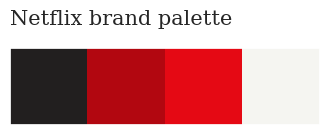

In [270]:
# Create a brand palette using sns.palplot() for our visualisations that follow netflix colours
# The netflix colours are black, dark red, red, and white
brand_palette = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']
sns.palplot(brand_palette)

# Use plt.title() to provide font to be used for all the headings and descriptions
plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### Problem Statement 1: Product Centric Perspective

#### 3.1.1 Movie to TV Show Ratio

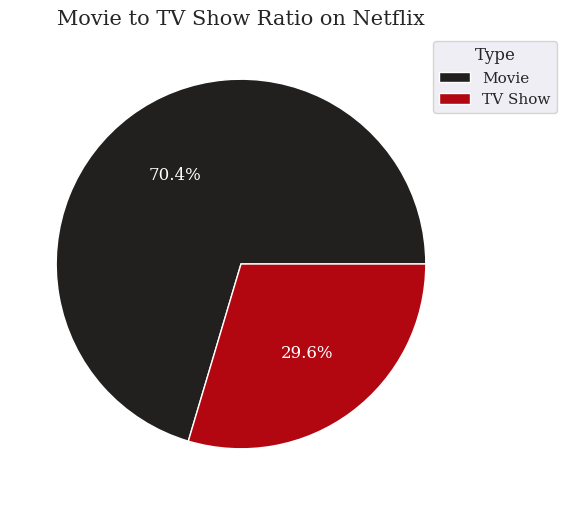

In [271]:
# Display the ratio of movies to tv shows available on Netflix
plt.figure(figsize=(6, 6))
# Our brand palette, inspired by Netflix's colours, will be used for the design
sns.set_palette(brand_palette)
# Use labeldistance and textprops to set the color and font properties of the percentage values in the pie chart
plt.pie(df.groupby('type').size(), labels=df['type'].unique(), autopct='%1.1f%%', labeldistance=1.1, textprops={'color': 'white', 'fontfamily': 'serif'})
# Use Seaborn's legend function to add a legend of the variables shown
plt.legend(df['type'].unique(), title='Type', loc='upper right', bbox_to_anchor=(1.2, 1))
# Provide a title for the pie chart with a specific font family and size
plt.title('Movie to TV Show Ratio on Netflix', fontfamily='serif', fontsize=15)
# Display the designed pie chart
plt.show()

#### 3.1.2 Movie to TV Show Distribution 

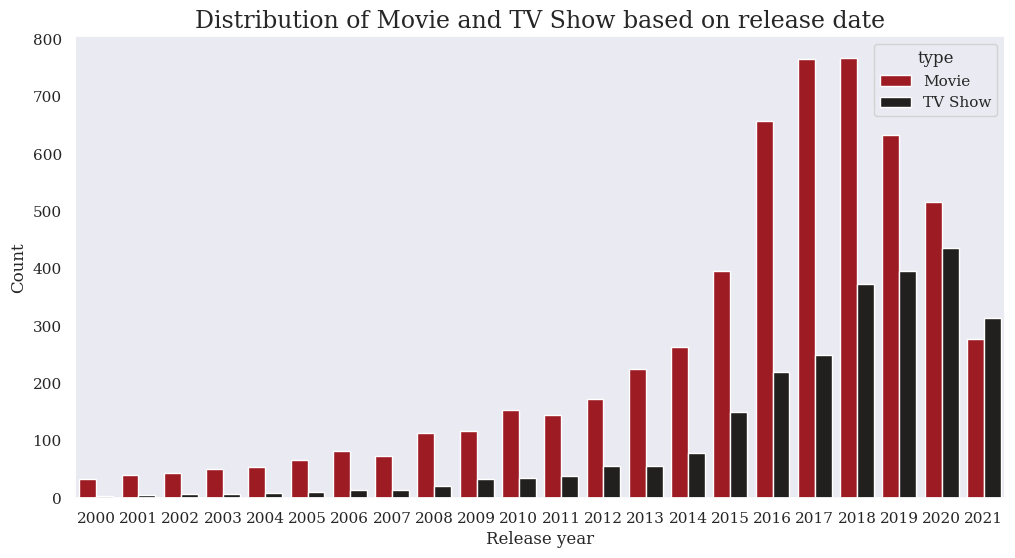

In [272]:
# Filter the DataFrame to include only data from the year 2000 and onwards to create a recent visualisation
xre = df[df['release_year'] >= 2000]
plt.figure(figsize=(12, 6))
# Use Seaborn's displot to create a distribution plot 
sns.countplot(xre, x='release_year', hue='type', palette={'Movie': '#b20710', 'TV Show': '#221f1f'})
# Set the title of the plot with serif font
plt.title('Distribution of Movie and TV Show based on release date', fontfamily='serif', fontsize=17)
# Set the x-axis label with serif font
plt.xlabel('Release year', fontfamily='serif', fontsize=12)
# Set the y-axis label with serif font
plt.ylabel('Count', fontfamily='serif', fontsize=12)
# Display the plot
plt.show()

#### 3.1.3 Distribution of Ratings

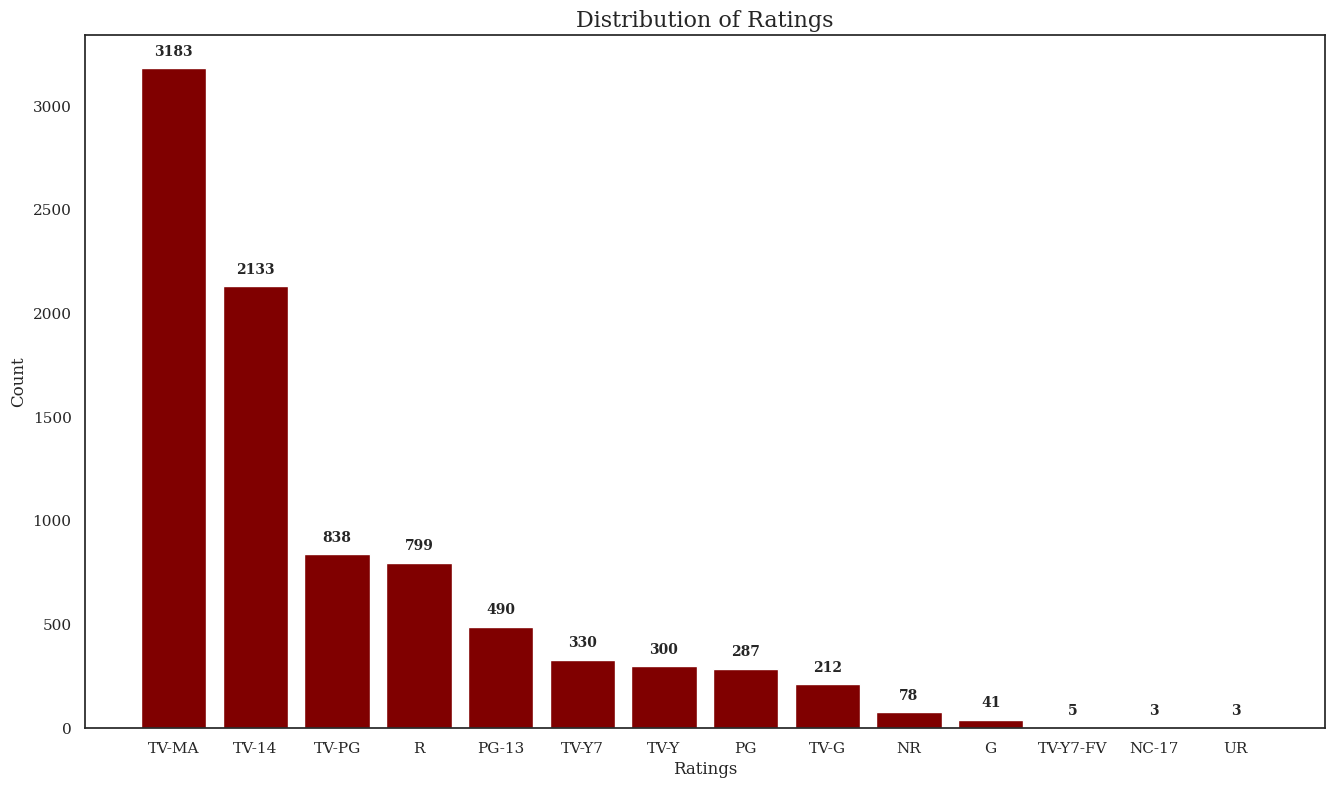

In [273]:
# Set seaborn style and color palette
sns.set(style="white", palette=brand_palette)

# Plotting the distribution of ratings
x = list(df['rating'].value_counts().index)
y = list(df['rating'].value_counts().values)

# Setting font family to serif
# Set plot size to 16 inches for width and 9 inches for height
# Set bar colour as maroon
rcParams['font.family'] = 'serif'
plt.subplots(figsize=(16, 9))
plt.bar(x, y, color='maroon')

# Displaying values on top of the bar 
# Set values to be in the middle, with bold format and size 10
for i, v in enumerate(y):
    plt.text(i, v + 60, str(v), ha="center", weight="bold", size=10)
    
# Display chart title in size 16
plt.title('Distribution of Ratings', fontsize=16)
# Display x axis label in size 12
plt.xlabel('Ratings', fontsize=12)
# Display y axis label in size 12
plt.ylabel('Count', fontsize=12)
# Display the plot 
plt.show()

#### 3.1.4 Distribution of Genres of Count of Movies

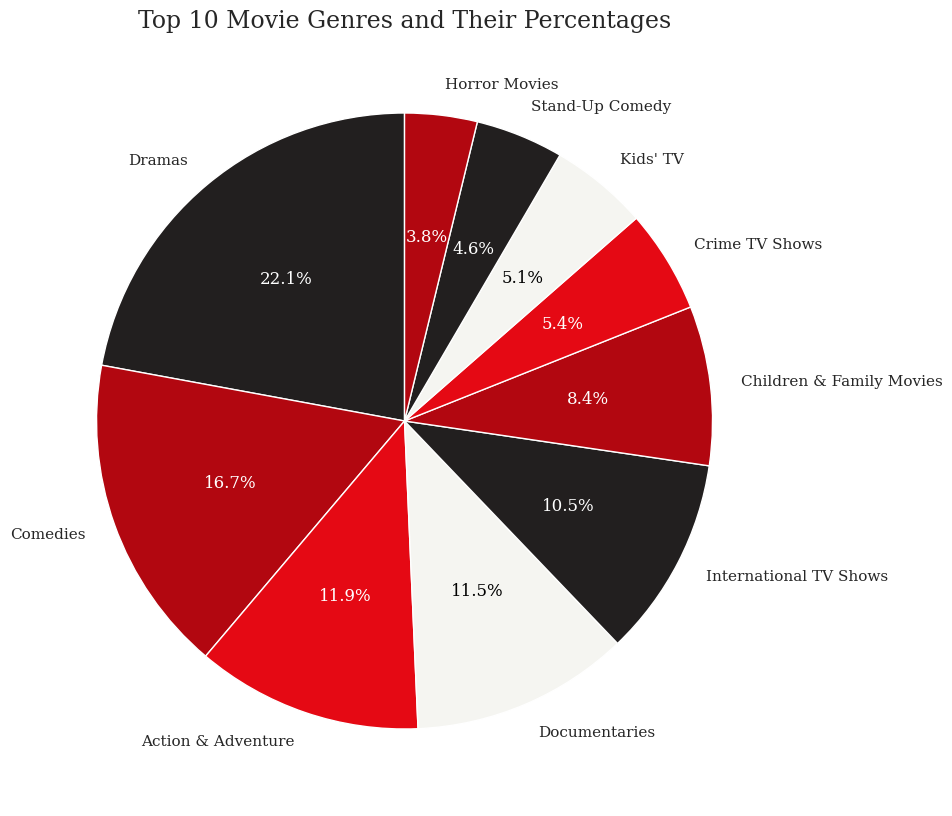

In [274]:
# Create a dataframe to find the name of all the genres
unique_genres = df['genre'].unique()
# Create a dataframe to find the number of all the genres
genre_counts = df['genre'].value_counts()

# Select the top 10 genres for analysis
top_10_genres = genre_counts.head(10)
# Plotting the pie chart with customized pie colors from the brand palette
# Set the percentage values to be with 1 decimal place
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=90, colors=brand_palette)
# Set the title with serif font
plt.title('Top 10 Movie Genres and Their Percentages', fontfamily='serif', fontsize=17)

# Customize the percentage colour for specific genres, Kids' TV and Documentaries, to black for better visualisation
# Set the percentage colour for other genres to white
for autotext, genre, percentage in zip(autotexts, top_10_genres.index, wedges):
    if genre == "Kids' TV" or genre == "Documentaries":
        autotext.set_color('black')
    else:
        autotext.set_color('white')

# Display the plot
plt.show()

#### 3.1.5 Top 5 TV Shows in Seasons

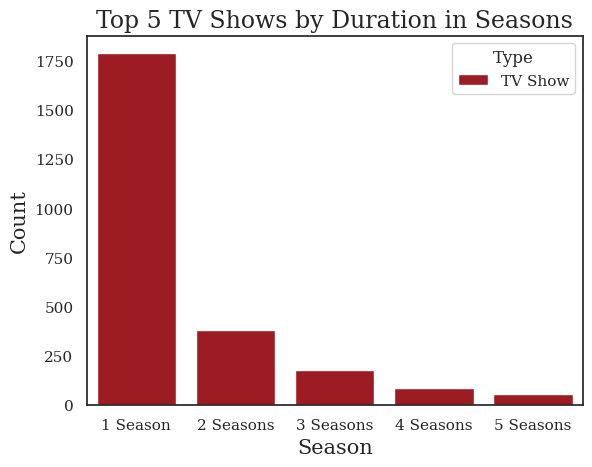

In [275]:
# Create a separate dataframe to show the number of tv shows in terms of seasons
tv_show = df[df['type']=='TV Show']
# Create a separate dataframe to show the duration of tv shows in terms of seasons
duration_tv_show = tv_show.groupby(['duration', 'type'])['type'].count().sort_values(ascending=False).reset_index(name='duration_count')
# Display the top 5 tv shows in terms of the number of seasons
# Use the red colors in the sns.barplot for the bars
sns.barplot(x='duration', y='duration_count', data=duration_tv_show[:5], hue='type', palette={'TV Show': '#b20710'})
# Set the title of the plot with serif font and size 17
plt.title('Top 5 TV Shows by Duration in Seasons', fontfamily='serif', fontsize=17)
# Set the x-axis label with serif font and size 15
plt.xlabel('Season', fontfamily='serif', fontsize=15)
# Set the y-axis label with serif font and size 15
plt.ylabel('Count', fontfamily='serif', fontsize=15)
# Set legend font to serif and size to 12
legend = plt.legend()
legend.set_title('Type', prop={'size': 12, 'family': 'serif'})
plt.setp(legend.get_texts(), family='serif')
# Display the plot
plt.show()

#### 3.1.6 Top 5 TV Shows in Terms of Minutes

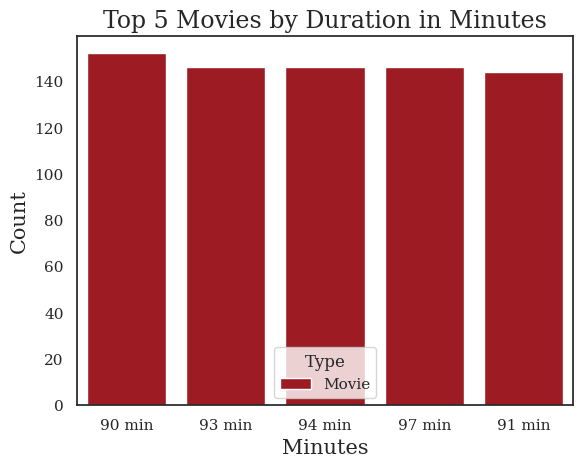

In [276]:
# Create a separate dataframe to show the number of movies in terms of duration
movies = df[df['type'] == 'Movie']
# Create a separate dataframe to show the duration of movies in terms of minutes
duration_movies = movies.groupby(['duration', 'type'])['type'].count().sort_values(ascending=False).reset_index(name='duration_count')
# Display the top 5 movies in terms of duration in minutes
# Use the red color in the sns.barplot for the bars
sns.barplot(x='duration', y='duration_count', data=duration_movies[:5], hue='type', palette={'Movie': '#b20710'})
# Set the title of the plot with serif font and size 17
plt.title('Top 5 Movies by Duration in Minutes', fontfamily='serif', fontsize=17)
# Set the x-axis label with serif font and size 15
plt.xlabel('Minutes', fontfamily='serif', fontsize=15)
# Set the y-axis label with serif font and size 15
plt.ylabel('Count', fontfamily='serif', fontsize=15)
# Set legend font to serif and size to 12
legend = plt.legend()
legend.set_title('Type', prop={'size': 12, 'family': 'serif'})
plt.setp(legend.get_texts(), family='serif')
# Display the plot
plt.show()


### Business Centric Perspective

#### 3.2.1 Top 10 Countries by Movies and TV Shows

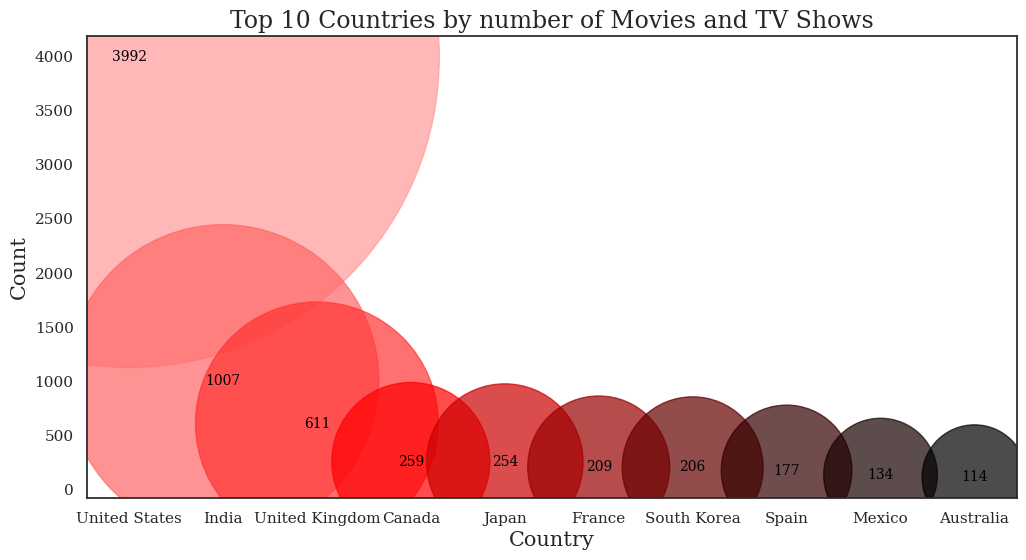

In [277]:
# Create a separate dataframe to show the counts of titles by each country 
country_counts = df['country'].value_counts()
# Select the top 10 countries for analysis
top_10_countries = country_counts.head(10)
# Define different shades of red for each country, based on Netflix colours
red_shades = ['#FF9999', '#FF6666', '#FF3333', '#FF0000', '#CC0000', '#990000', '#660000', '#330000', '#190000', '#000000']
# Plotting the bubble chart with values inside each bubble
plt.figure(figsize=(12, 6))
plt.scatter(top_10_countries.index, top_10_countries.values, s=top_10_countries.values * 50, c=red_shades, alpha=0.7)
# Display the count values inside each bubble
# Set the value with center alignment, serif font, size 10, and in black colour
for country, count in zip(top_10_countries.index, top_10_countries.values):
    plt.text(country, count, str(count), ha='center', va='center', fontfamily='serif', fontsize=10, color='black')
# Set the title with serif font and size 17
plt.title('Top 10 Countries by number of Movies and TV Shows', fontfamily='serif', fontsize=17)
# Set X-axis label with serif font and size 15
plt.xlabel('Country', fontfamily='serif', fontsize=15)
# Set Y-axis label with serif font and size 15
plt.ylabel('Count', fontfamily='serif', fontsize=15)
# Display the plot
plt.show()

#### 3.2.2 Top 10 countries by percentage of Movies and TV Shows

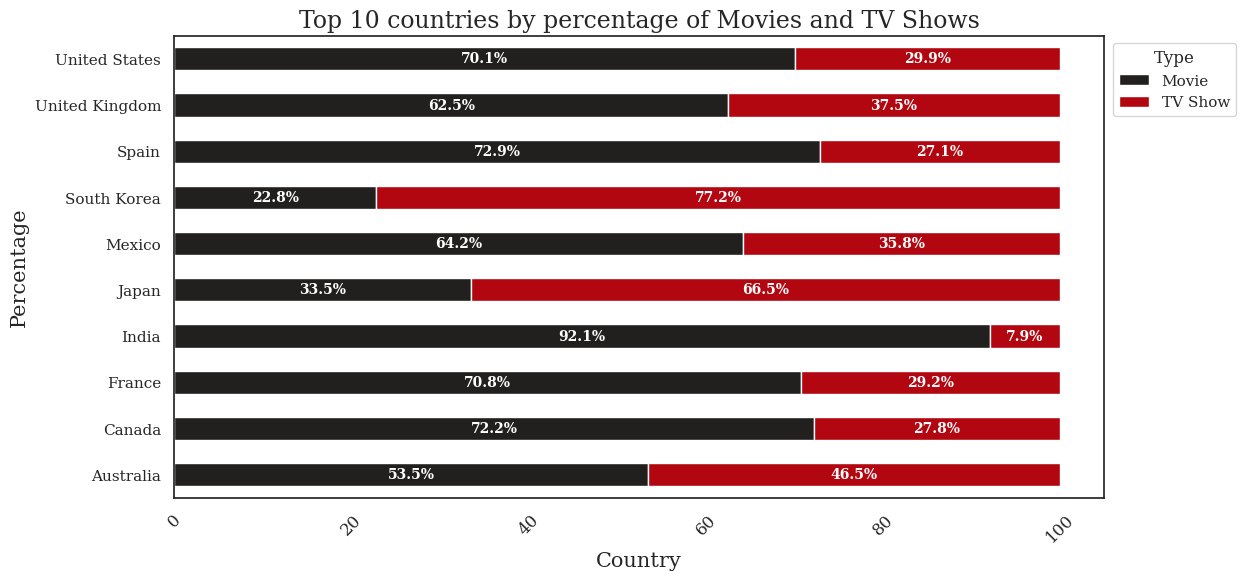

In [372]:
# Create a dataframe to get the top 10 countries
top_countries = df['country'].value_counts().index[:10]
# Filter the DataFrame for the top 10 countries
top_countries_df = df[df['country'].isin(top_countries)]
# Count the occurrences of each type within each country
count_table = pd.crosstab(top_countries_df['country'], top_countries_df['type'])
# Convert counts to percentages
percent_table = count_table.div(count_table.sum(axis=1), axis=0) * 100

# Set the style to use the serif font
sns.set_theme(style='white', font='serif')
# Plot the chart
plt.figure(figsize=(12, 6))
# Create a horizontal percent stacked bar plot
percent_table.plot(kind='barh', stacked=True, color=brand_palette, ax=plt.gca())

# Adding percentage values to the bars 
# Adding the total stated below to half of the current percentage value to place the value at the midpoint of the bar
# Display value with one decimal place and percentage sign after the value
# Set value style to center alignment, white colour, serif font, and bold style
for i in range(len(top_countries)):
    total = 0
    for j in range(len(percent_table.columns)):
        plt.text(total + percent_table.iloc[i, j]/2, i, f"{percent_table.iloc[i, j]:.1f}%", ha='center', va='center', color='white', fontsize=10, fontfamily = 'serif', fontweight='bold')
        total += percent_table.iloc[i, j]

        # Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontfamily='serif', fontsize=12)
# Set the title with serif font
plt.title('Top 10 countries by percentage of Movies and TV Shows', fontfamily='serif', fontsize=17)
# Set X-axis label with serif font
plt.xlabel('Country', fontfamily='serif', fontsize=15)
# Set Y-axis label with serif font
plt.ylabel('Percentage', fontfamily='serif', fontsize=15)

# Add legend with size 15 in the upper right corner and adjust title position using rcParams
plt.legend(title='Type', loc='upper right', bbox_to_anchor=(1.15, 1))
matplotlib.rcParams['legend.title_fontsize'] = '15'
# Display the plot 
plt.show()

#### 3.2.3 Top 10 Countries by Number of Movies

/var/folders/br/j32l48hj3pl6vznj0z0y0pth0000gn/T/ipykernel_10954/2529045091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/var/folders/br/j32l48hj3pl6vznj0z0y0pth0000gn/T/ipykernel_10954/2529045091.py:9: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


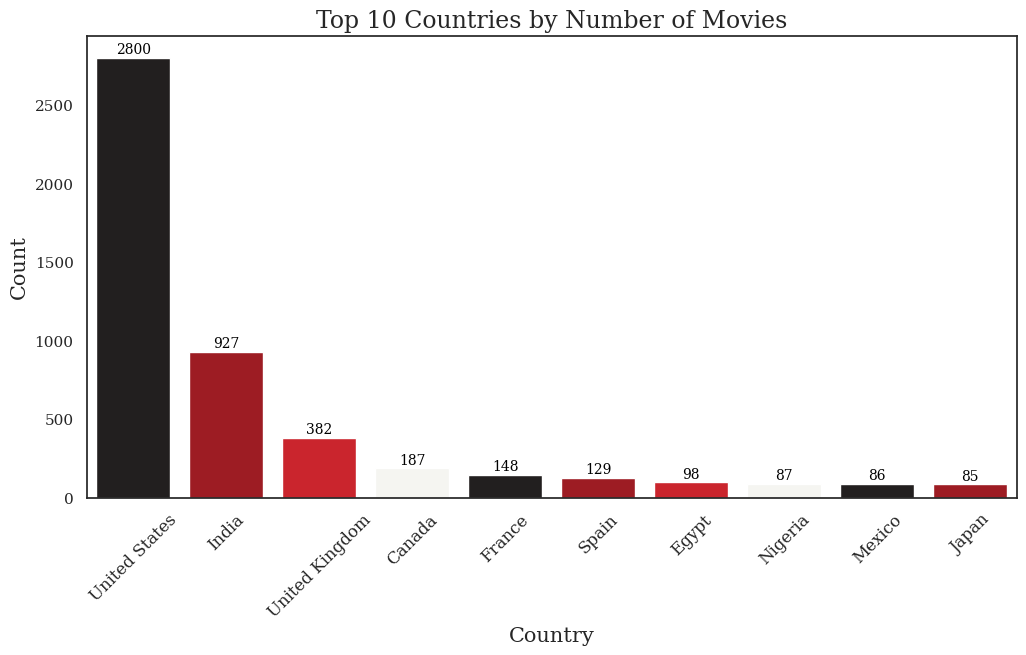

In [279]:
# Create a separate dafaframe to filter out rows with 'Unknown' country and content type is 'Movie'
movies_by_country = df[(df['country'] != 'Unknown') & (df['type'] == 'Movie')]
# Set the style to use the serif font and white background colour
sns.set_theme(style='white', font='serif')
# Plotting the bar chart on movies using countplot() and selecting the top 10 countries
# Setting chart size to follow width 12 inches and height 6 inches
# Setting chart style to follow brand palette 
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='country',
    data=movies_by_country,
    order=movies_by_country['country'].value_counts().index[:10],
    palette=brand_palette)
# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontfamily='serif', fontsize=12)
# Set the title with serif font and size 17
plt.title('Top 10 Countries by Number of Movies', fontfamily='serif', fontsize=17)
# Set X-axis label with serif font and size 15
plt.xlabel('Country', fontfamily='serif', fontsize=15)
# Set Y-axis label with serif font and size 15
plt.ylabel('Count', fontfamily='serif', fontsize=15)
# Add count values above each bar
# Iterate over each bar in the bar chart and get the height of the bar
# Annotate the bar with an integer value and center alignment
# Set value to be six points above the bar 
# Set value style to be serif font, size 10, and black colour
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontfamily='serif', fontsize=10, color='black')
# Display the plot
plt.show()

#### 3.2.4 Top 10 Countries by Number of TV Shows

/var/folders/br/j32l48hj3pl6vznj0z0y0pth0000gn/T/ipykernel_10954/2840223510.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/var/folders/br/j32l48hj3pl6vznj0z0y0pth0000gn/T/ipykernel_10954/2840223510.py:10: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


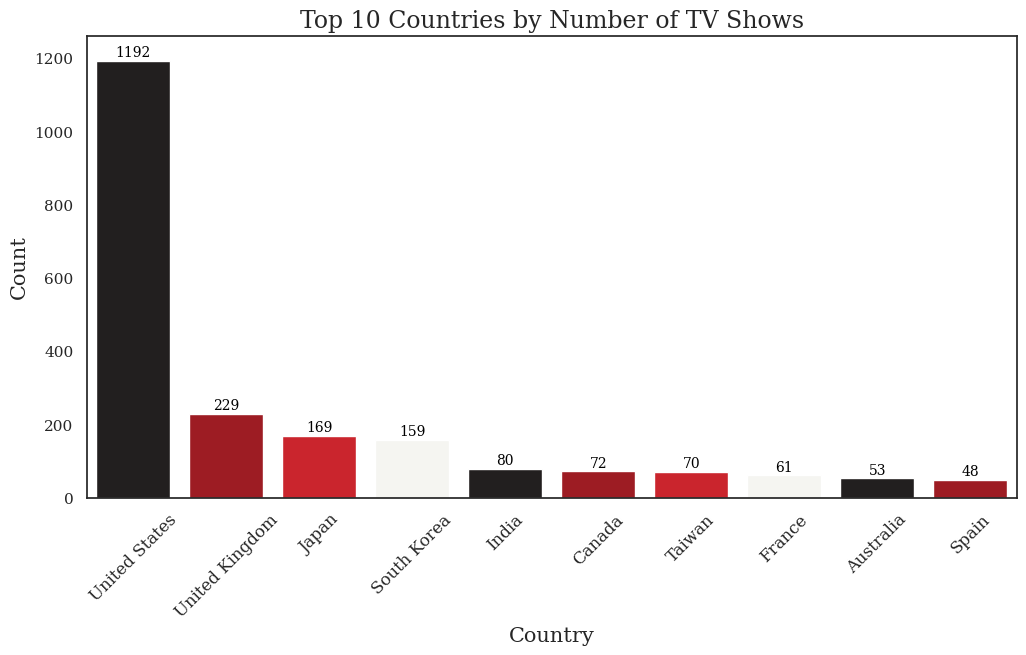

In [280]:
# Create a separate dafaframe to filter out rows with 'Unknown' country with the content type being 'TV Show'
tvshows_by_country = df[(df['country'] != 'Unknown') & (df['type'] == 'TV Show')]
# Set the style to use the white backrgound and serif font 
sns.set_theme(style='white', font='serif')

# Plotting the bar chart on tv shows using countplot() and selecting the top 10 countries
# Setting chart size to follow width 12 inches and height 6 inches
# Setting chart style to follow brand palette plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='country',
    data=tvshows_by_country,
    order=tvshows_by_country['country'].value_counts().index[:10],
    palette=brand_palette)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontfamily='serif', fontsize=12)
# Set the title with serif font
plt.title('Top 10 Countries by Number of TV Shows', fontfamily='serif', fontsize=17)
# Set X-axis label with serif font
plt.xlabel('Country', fontfamily='serif', fontsize=15)
# Set Y-axis label with serif font and size 15
plt.ylabel('Count', fontfamily='serif', fontsize=15)
# Set y-axis limits to ensure space for annotations
ax.set_ylim(0, ax.get_ylim()[1] + 10)

# Add count values above each bar
# Iterate over each bar in the bar chart and get the height of the bar
# Annotate the bar with an integer value and center alignment
# Set value to be six points above the bar 
# Set value style to be serif font, size 10, and black colour
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontfamily='serif', fontsize=10, color='black')

# Display the plot
plt.show()

#### 3.2.5 Content Lag on Netflix

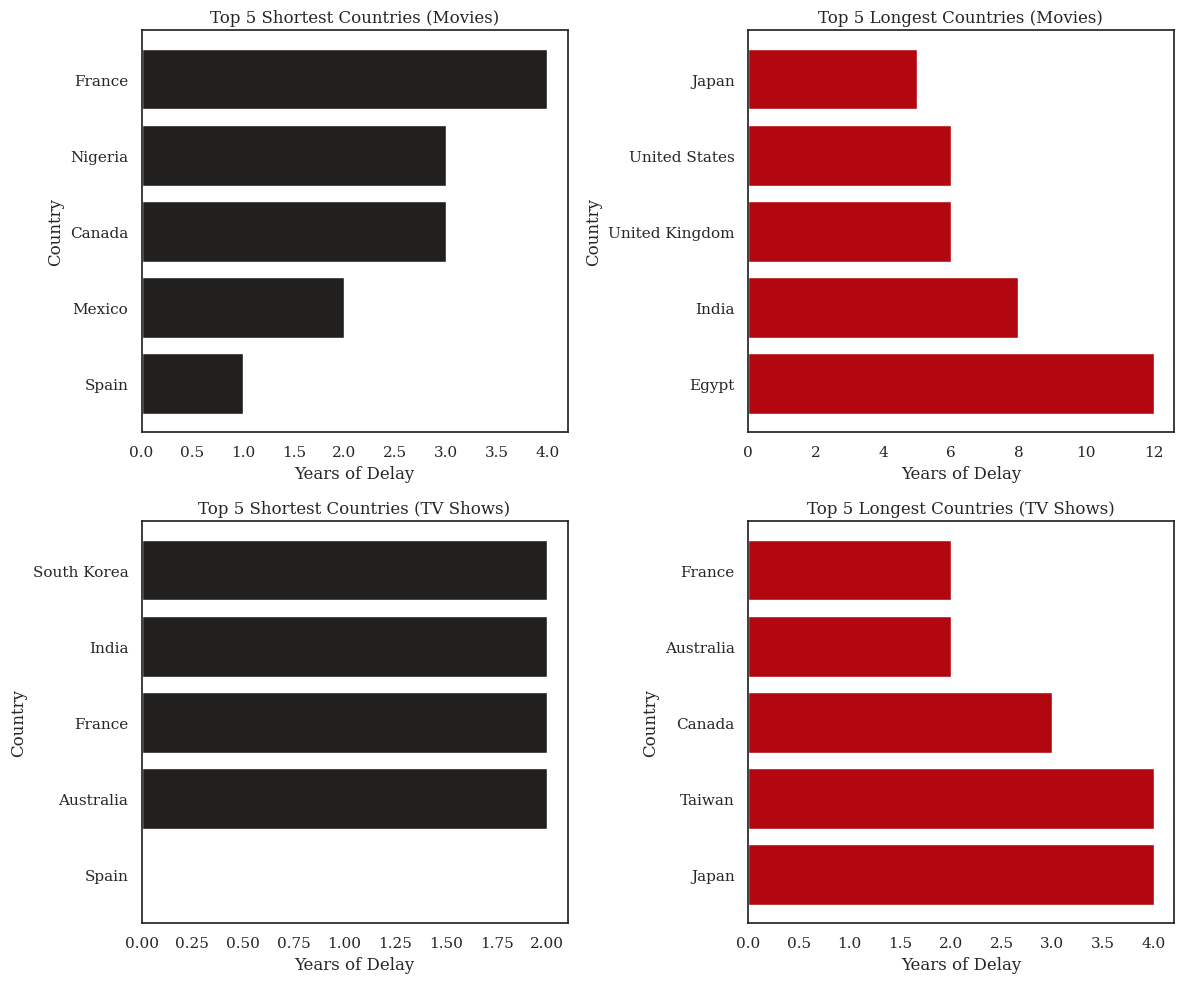

In [281]:
# Create two dataframes to group the list of top countries for Movies and TV shows
movie_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Spain', 'Egypt', 'Nigeria', 'Mexico', 'Japan']
tv_show_countries = ['United States', 'United Kindgom', 'Japan', 'South Korea', 'India', 'Canada', 'Taiwan', 'France', 'Australia', 'Spain']
# Create a new column 'first_country' based on the first country in the list
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
# Split content based on TV shows and Movies, store into separate variables
df_shows = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
# Filter data for the specified countries for movies and TV shows
df_movies_filtered = df_movies[df_movies['first_country'].isin(movie_countries)]
df_shows_filtered = df_shows[df_shows['first_country'].isin(tv_show_countries)]

# Calculate the mean release year based on each country for TV shows and movies separately
mean_shows = df_shows_filtered.groupby('first_country')[['release_year', 'year_added']].mean().round()
mean_movies = df_movies_filtered.groupby('first_country')[['release_year', 'year_added']].mean().round()
# Calculate the difference between release and added years to find the delay for movies and TV shows
mean_shows['delay'] = mean_shows['year_added'] - mean_shows['release_year']
mean_movies['delay'] = mean_movies['year_added'] - mean_movies['release_year']

# Find the top 5 shortest and longest countries to add movies and TV shows on Netflix
# Create a dataframe and calculate the means of movie values by delay in year added
# Sort shortest movies by choosing top 5 from ascending order
# Sort longest movies by choosing top 5 from descending order
# Create a loop to do find shortest and longest tv shows delay
# Sort the tv show in ascending and choose top 5 if the mean of tv show delay is larger than 0
# Sort the tv show in descending and choose top 5 if the mean of tv show delay is larger than 0
top_shortest_movies = mean_movies.sort_values(by='delay').head(5)
top_longest_movies = mean_movies.sort_values(by='delay', ascending=False).head(5)
if (mean_shows['delay'] > 0).any():
    top_shortest_shows = mean_shows.sort_values(by='delay').head(5)
    top_longest_shows = mean_shows.sort_values(by='delay', ascending=False).head(5)

# Visualize or present the results as needed
# Code to generate top shortest and longest countries for movies and TV shows
# Assuming you've already defined the variables top_shortest_movies, top_longest_movies,
# top_shortest_shows, top_longest_shows from the previous snippet
# Create subplots for movies and TV shows
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Function to plot a bar chart given the data and axis
def plot_bar(data, ax, title, color):
    ax.barh(data.index, data['delay'], color=color)
    ax.set_title(title)
    ax.set_xlabel('Years of Delay')
    ax.set_ylabel('Country')
    
# Plotting for top shortest and longest countries for movies
plot_bar(top_shortest_movies, axs[0, 0], 'Top 5 Shortest Countries (Movies)', '#221f1f')
plot_bar(top_longest_movies, axs[0, 1], 'Top 5 Longest Countries (Movies)', '#b20710')
# Plotting for top shortest and longest countries for TV shows
plot_bar(top_shortest_shows, axs[1, 0], 'Top 5 Shortest Countries (TV Shows)', '#221f1f')
plot_bar(top_longest_shows, axs[1, 1], 'Top 5 Longest Countries (TV Shows)', '#b20710')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### 3.2.11 Monthly Distribution of Added Titles

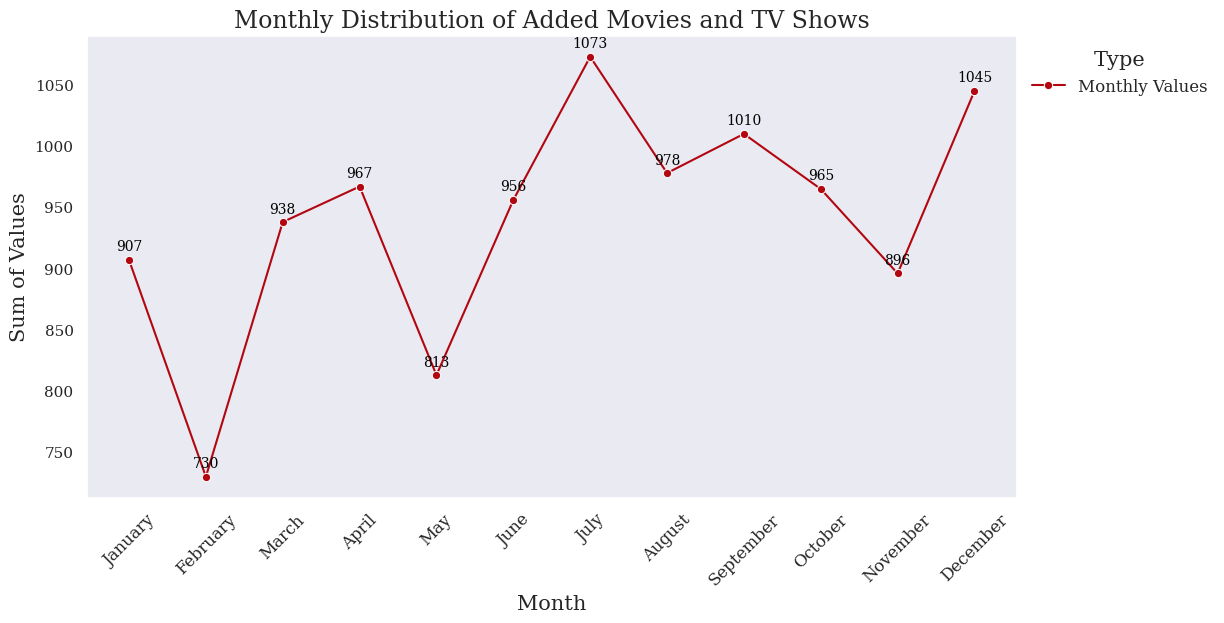

In [369]:
# Create a dataframe to group all 12 months in order
month_order = ['January','February','March','April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December']
# Group by 'type' and 'month_name_added', count occurrences, and fill missing values with 0
grouped_data = df.groupby('type')['month_name_added'].value_counts().unstack()

# Create a dataframe to select only 'TV Show' and 'Movie' types
selected_data = grouped_data.loc[['TV Show', 'Movie']]
# Calculate cumulative sum along the rows and transpose the DataFrame
data_sub = selected_data.cumsum(axis=0).T

# Convert column into categorical format with the months in order
df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)
# Create a new column from the sum of movie and tv show values
# Reset column into integer format
data_sub['Value'] = data_sub['Movie'] + data_sub['TV Show']
data_sub = data_sub.reset_index()

# Convert 'month_name_added' to a categorical data type with the correct order
df_polar['month_name_added'] = pd.Categorical(df_polar['month_name_added'], categories=month_order, ordered=True)

# Sort the DataFrame based on the categorical order of months
df_polar = df_polar.sort_values('month_name_added')

# Group by 'month_name_added' and calculate the sum of 'values' for each month
monthly_values = df_polar.groupby('month_name_added')['Value'].sum().reset_index()

# Set the style to use the serif font
sns.set_theme(style='dark', font='serif')

# Plotting the line chart with the correct order of months
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='month_name_added', y='Value', data=monthly_values, marker='o', color='#b20710', label='Monthly Values')

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontfamily='serif', fontsize=12)
# Set the title with serif font
plt.title('Monthly Distribution of Added Movies and TV Shows', fontfamily='serif', fontsize=17)
# Display the legend
plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize='15', frameon=False)

# Set X-axis label with serif font
plt.xlabel('Month', fontfamily='serif', fontsize=15)
# Set Y-axis label with serif font
plt.ylabel('Sum of Values', fontfamily='serif', fontsize=15)
# Add value annotations for each point
for index, value in enumerate(monthly_values['Value']):
    ax.text(index, value + 5, str(int(value)), ha='center', va='bottom', fontfamily='serif', fontsize=10, color='black')

# Display the plot
plt.show()

### Exporting the final dataframe

In [370]:
# Exporting the final dataframe into a CSV file
df.to_csv("Finalized_Netflix_Dataset.csv", index=False)